#  simple neural network with two hidden layers 

In [49]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# load dataset
df = pd.read_csv('csv')

# getting the unique districts in a list
district_unique = df['district'].unique()

# Extract relevant features and target variable
X = df[['state', 'district', 'market', 'commodity', 'variety', 'arrival_date', 'min_price', 'max_price']]
y = df['modal_price']

# Convert categorical variables to one-hot encoding
X = pd.get_dummies(X, columns=['state', 'district', 'market', 'commodity', 'variety'])

# Convert date strings to numerical format
X['arrival_date'] = pd.to_datetime(X['arrival_date']).astype(int) / 10**9

# Split the data set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

# Define the loss function and optimizer
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam())

# Train the model using the training set
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=0)

# Evaluate the model using the testing set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)


14/14 [==============================] - 0s 2ms/step
Mean squared error: 6105322.395254408


<Axes: xlabel='modal_price', ylabel='Count'>

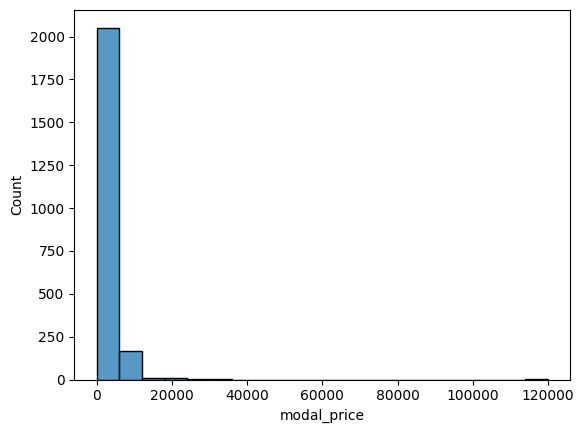

In [50]:
import seaborn as sns

sns.histplot(data=df, x='modal_price', bins=20)

<ipython-input-51-5b1d1b471008>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

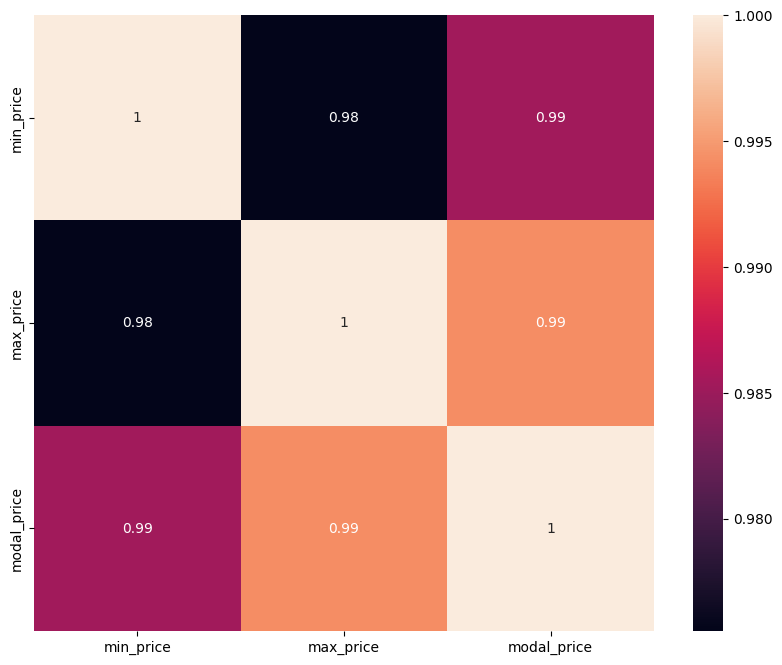

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)